## 첫번째 신경망 훈련하기 : 기초적인 분류 문제

In [ ]:
# tensorflow, keras import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


### 패션 MNIST 데이터셋 임포트
- 10개의 범주, 7만개의 이미지
- 해상도 28*28 픽셀

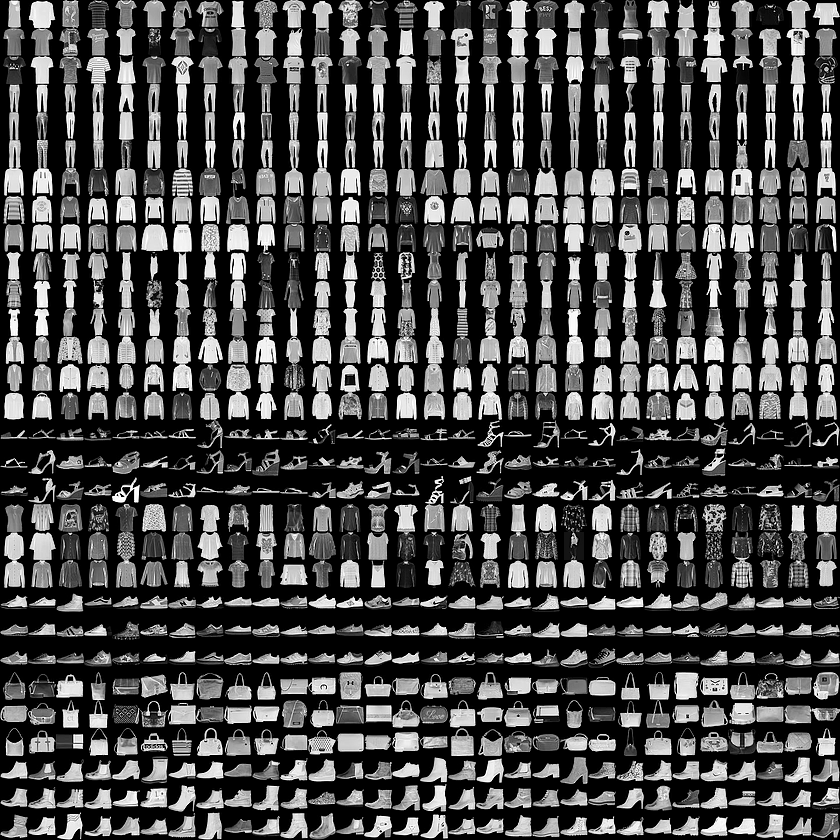

- 훈련 데이터셋 6만개 이미지
- 테스트 데이터셋 1만개 이미지

In [ ]:
# 데이터셋 임포트
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


- 이미지는 28*28 크기의 넘파이배열
- 픽셀 값은 0과 255 사이
- 레이블은 0에서 9까지의 정수배열 (= 이미지(옷)의 클래스)



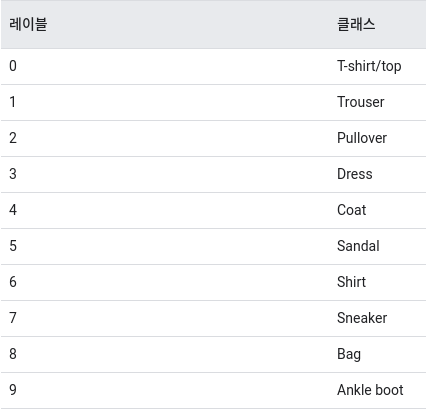

In [ ]:
from PIL import Image
Image.open('/content/스크린샷, 2021-05-03 21-36-05.png')

- 각 이미지는 하나의 레이블에 매핑
- 데이터셋에는 클래스 이름X --> 나중에 이미지 출력시 사용위해 별도의 변수 사용

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [ ]:
print('훈련 데이터셋의 shape: ', train_images.shape)
print('훈련 데이터셋의 labels: ', len(train_labels))
print('레이블: ', train_labels)
print('테스트 데이터셋 shape: ', test_images.shape)
print('테스트 데이터셋의 labels: ', len(test_labels))

훈련 데이터셋의 shape:  (60000, 28, 28)
훈련 데이터셋의 labels:  60000
레이블:  [9 0 0 ... 3 0 5]
테스트 데이터셋 shape:  (10000, 28, 28)
테스트 데이터셋의 labels:  10000


### 데이터 전처리
- 픽셀값의 범위 0 ~ 255 사이 --> 0 ~ 1 사이로 조정
- 딥러닝 모델은 단순한 정수보다 0 ~ 1 사이 실수 처리할 시 더 좋은 성능 (정규화)
- 이미지에 255를 나눠줌

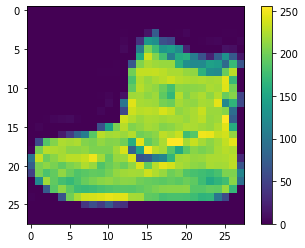

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- 훈련세트에서 25개의 이미지와 클래스 이름 출력
- 데이터 포맷이 올바른 지 확인

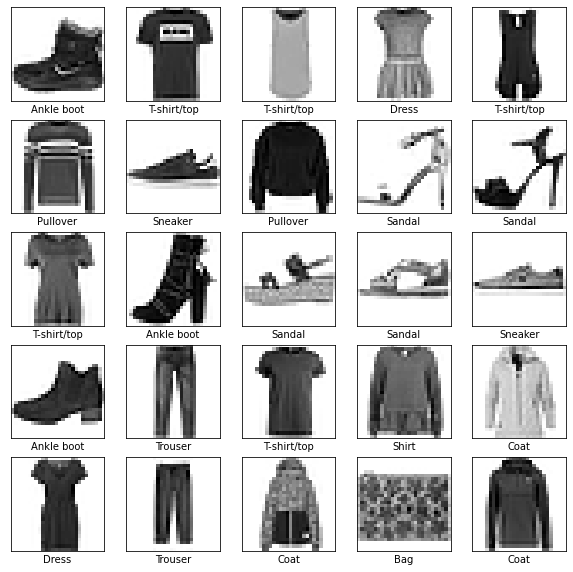

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
- 신경망 모델의 층을 구성한 다음 모델 컴파일

#### 층 설정
- 신경망의 기본 구성요소 = 층(layer)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- Flatten 층 : 2차원 배열(28*28)의 이미지 포맷을 28X28 = 784픽셀의 1차원 배열로 변환 (평탄화)
- Dense 층 : 완전연결(fully-connected)층
  - 1번째 층 : 128개의 노드, relu 활성화함수
  - 2번째 층 : 10개의 노드, softmax 활성화함수 (10개 클래스 중 하나에 속할 확률)

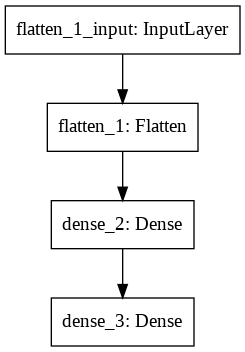

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### 모델 컴파일
- 모델을 훈련하기 전 필요한 몇 가지 설정 컴파일 단계에서 추가
  - 손실 함수
  - 옵티마이저
  - 지표

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # one-hot encoding 형태로 레이블 제공 시 categorical crossentropy 사용
              metrics=['accuracy'])

### 모델 훈련
- 신경망 모델 훈련단계
1. 훈련 데이터를 모델에 주입 (train_images, train_labels)
2. 모델이 이미지와 레이블 매핑하는 방법 학습
3. 테스트 세트에 대한 모델의 예측 (test_images, test_labels)

In [ ]:
# 모델 학습 (model.fit 메서드)
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6229 - accuracy: 0.7855
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3850 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3159 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8904


- 훈련 데이터셋에서 89% 정도의 정확도
---
### 정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3553 - accuracy: 0.8682

테스트 정확도: 0.8682000041007996


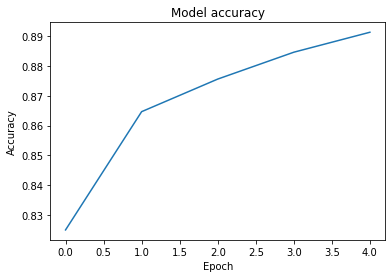

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

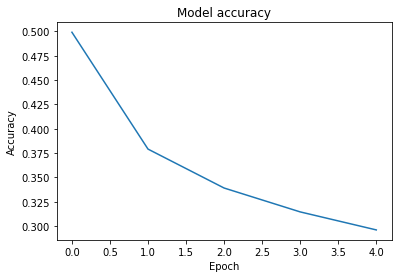

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

- 훈련 세트와 테스트 세트의 정확도 사이 차이는 과대적합 때문

---
### 예측 만들기
- 훈련된 모델 사용하여 이미지에 대한 예측 만들 수 있음

In [ ]:
predictions = model.predict(test_images)
# 첫번째 예측 확인
predictions[0]

array([1.6853284e-05, 1.3545680e-08, 2.1632441e-06, 8.6683845e-05,
       9.6856570e-07, 3.7058599e-02, 7.8442616e-05, 6.3577071e-02,
       3.6513884e-04, 8.9881402e-01], dtype=float32)

In [ ]:
# 첫 번째 예측 중 가장 높은 신뢰도를 가진 레이블
print(np.argmax(predictions[0]))

# 테스트 레이블과 비교
print(test_labels[0])

9
9


- 10개 클래스에 대한 예측을 그래프로 표현

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: # 예측이 맞을 경우 파란색, 틀릴경우 빨간색
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # 예측 레이블
                                100*np.max(predictions_array), # 신뢰도 점수
                                class_names[true_label]), # 실제 정답
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

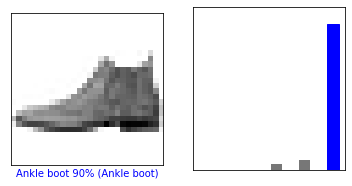

In [ ]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

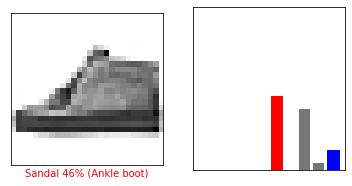

In [ ]:
i = 107
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

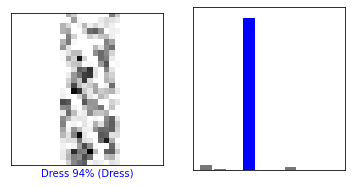

In [ ]:
i = 3333
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

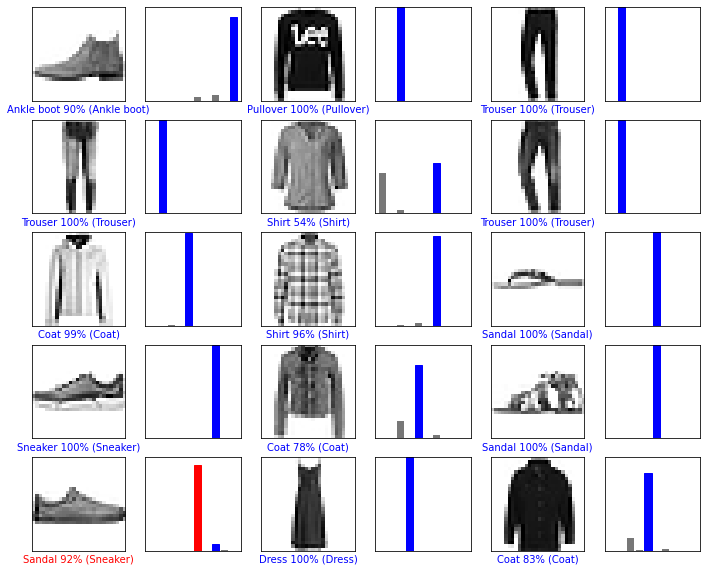

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

- 훈련된 모델 사용하여 한 이미지에 대한 예측 만들기

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


- keras는 한 번에 샘플의 묶음 또는 배치로 예측을 만드는 데 최적화
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# 이미지에 대한 예측
predictions_single = model.predict(img)

print(predictions_single)

[[1.6853252e-05 1.3545706e-08 2.1632418e-06 8.6683845e-05 9.6856570e-07
  3.7058618e-02 7.8442536e-05 6.3577071e-02 3.6513922e-04 8.9881402e-01]]


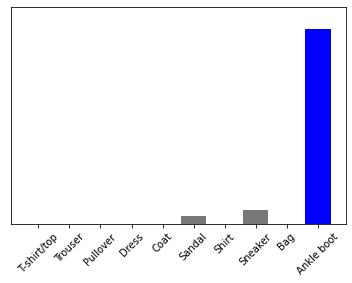

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

---
## 기본 텍스트 분류 - 영화 리뷰를 사용한 텍스트 분류
- 영화 리뷰 텍스트를 긍정 또는 부정으로 분류
- 이진(binary) 분류 문제
- 인터넷 영화 데이터베이스의 IMDB 데이터셋 사용 : 5만개의 영화리뷰 텍스트
- 25000개의 훈련데이터셋, 25000개의 테스트 데이터셋
- 긍정적 리뷰와 부정적 리뷰 개수 동일

### IMDB 데이터셋 다운로드
- 리뷰들은 미리 전처리 된 상태 : 정수 시퀸스로 변환
- 각 정수는 어휘사전에 있는 특정 단어 의미
- 파라미터 num_words는 훈련 데이터에서 가장 많이 등장하는 상위 단어 개수

In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### 데이터 탐색
- 데이터셋은 정수배열
- 레이블은 0 또는 1 (0: 부정적, 1: 긍정적)

In [ ]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

훈련 샘플: 25000, 레이블: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- 영화 리뷰들은 길이가 다름
- 신경망의 입력은 길이가 같아야 하기 때문에 추후에 문제 해결

In [ ]:
len(train_data[0]), len(train_data[1])

(218, 189)

### 정수를 단어로 다시 변환하기

In [ ]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# decode_review 함수 이용해 첫 번째 리뷰 텍스트 출력
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### 데이터 준비
- 리뷰(정수 배열)는 신경망에 주입하기 전 텐서로 변환되어야 함
- 변환 방법
  1. One-Hot Encoding : 정수배열을 0과 1로 이루어진 벡터로 변환
    - 실수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용
    - num_words * num_reviews 크기의 행렬이 필요하기 때문에 메모리 많이 사용
    
  2. 정수 배열의 길이가 모두 같도록 패딩 추가
    - max_length * num_reviews 크기의 정수 텐서 만듬
    - 이런 형태의 텐서 다룰 수 있는 임베딩(embedding)층을 첫 번째 층으로 사용

- 두 번째 방식 사용 : pad_sequences 함수 사용해 길이 맞춰줌

In [ ]:
# 두 번째 방식 사용
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
# 샘플 길이 확인
len(train_data[0]), len(train_data[1])

(256, 256)

In [ ]:
# 패딩된 첫 번째 리뷰 내용 확인
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### 모델 구성
- 모델 구조 결정
  - 모델에서 얼마나 많은 층을 사용할 것인가?
  - 각 층에서 얼마나 많은 은닉 유닛(층)을 사용할 것인가?
- 입력크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기

In [ ]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary() # 모델 구조 확인

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


1. Embedding 층
  - 정수로 인코딩된 단어를 입력받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾음
  - 벡터는 모델이 훈련되면서 학습됨
  - 벡터는 출력 배열에 새로운 차원으로 추가 (최종차원 (batch, sequence, embedding))

2. GlobalAveragePooling1D 층
  - sequence 차원에 대해 평균 계산하여 각 샘플에 대해 고정된 길이 출력벡터 반환
  - 길이가 다른 입력을 다루는 가장 간단한 방법

3. 16개의 은닉층을 가진 완전연결층(Dense) 통과

4. 출력노드를 가진 완전연결층
  - sigmoid 활성화 함수 사용하여 0과 1 사이의 실수 출력 (확률)

#### 손실함수와 옵티마이저

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', # 이진분류에 적합한 손실 함수 (정답타깃분포 - 예측 분포 사이의 거리 측정)
              metrics=['accuracy'])

### 검증세트 만들기

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### 모델 훈련
- 512개의 샘플로 이루어진 미니배치에서 40번의 epoch동안 훈련
- x_train, y_train 텐서에 있는 모든 샘플에 대해 40번 반복
- 검증세트에서 모델의 손실과 정확도 모니터링

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6925 - accuracy: 0.5241 - val_loss: 0.6893 - val_accuracy: 0.6436
Epoch 2/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6871 - accuracy: 0.6990 - val_loss: 0.6804 - val_accuracy: 0.7437
Epoch 3/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6753 - accuracy: 0.7604 - val_loss: 0.6633 - val_accuracy: 0.7277
Epoch 4/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6540 - accuracy: 0.7650 - val_loss: 0.6355 - val_accuracy: 0.7564
Epoch 5/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6200 - accuracy: 0.7838 - val_loss: 0.5984 - val_accuracy: 0.7901
Epoch 6/40
30/30 [==============================] - 0s 14ms/step - loss: 0.5786 - accuracy: 0.8041 - val_loss: 0.5555 - val_accuracy: 0.8080
Epoch 7/40
30/30 [==============================] - 0s 14ms/step - loss: 0.5289 - accuracy: 0.8342 - val_loss: 0.5122 - val_accuracy: 0.8251
Epoch 8/40
30

### 모델 평가
- 손실과 정확도

In [ ]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3321 - accuracy: 0.8728
[0.3320859670639038, 0.8727999925613403]


### 정확도와 손실 그래프 그리기
- History 객체에 훈련동안 일어난 정보가 담긴 dictionary 들어 있음

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

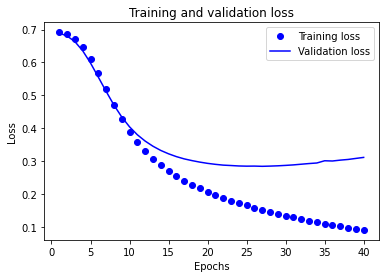

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

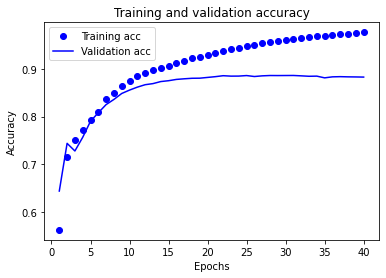

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 검증 손실과 정확도에서 약 15~20번째 epoch부터 과대적합 현상 보임
- 과대적합을 막기 위해 20번째 epoch 근처에서 훈련 멈출 수 있음
- callback을 사용하여 자동으로 훈련 멈출 수 있음

---
## 케라스와 텐서플로 허브를 사용한 영화 리뷰 텍스트 분류하기
- TF Hub와 Keras 사용한 기초적인 전이학습(transfer learning)

In [ ]:
!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("허브 버전: ", hub.__version__)
print("GPU", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")

     |████████████████████████████████| 3.9MB 9.1MB/s 
버전:  2.4.1
즉시 실행 모드:  True
허브 버전:  0.12.0
GPU 사용 가능


### IMDB 데이터셋 다운로드
- 훈련 세트 6대 4로 나눔
- train 15000개 , valid 10000개, test 25000개 사용

In [ ]:
# 훈련 세트를 6대 4로 나눕니다.
# 결국 훈련에 15,000개 샘플, 검증에 10,000개 샘플, 테스트에 25,000개 샘플을 사용하게 됩니다.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### 데이터 탐색
- 처음 10개 샘플 출력

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

- 처음 10개 레이블 출력

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

### 모델 구성
- 3 가지 구조적 결정 필요
  1. 어떻게 텍스트를 표현할 것인가?
  2. 모델에서 얼마나 많은 층을 사용할 것인가?
  3. 각 층에서 얼마나 많은 은닉 층을 사용할 것인가?

- 입력 데이터는 문장으로 구성, 예측 레이블은 0 또는 1
- 텍스트를 표현하는 한 가지 방법 : 임베딩 벡터로 바꾸는 것
- 첫 번째 층으로 사전 훈련된 텍스트 임베딩을 사용하는 장점
  1. 텍스트 전처리에 대해 신경 쓸 필요 없음
  2. 전이 학습의 장점 이용
  3. 임베딩 고정 크기이기 때문에 처리과정 단순

- TF hub에 있는 사전 훈련 텍스트 임베딩 모델 사용
- 입력 테스트 길이에 상관없이 임베딩의 출력 크기는 (num_examples, embedding_dimension)

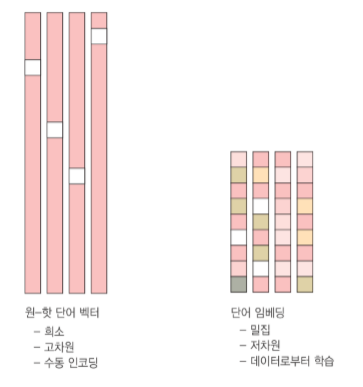

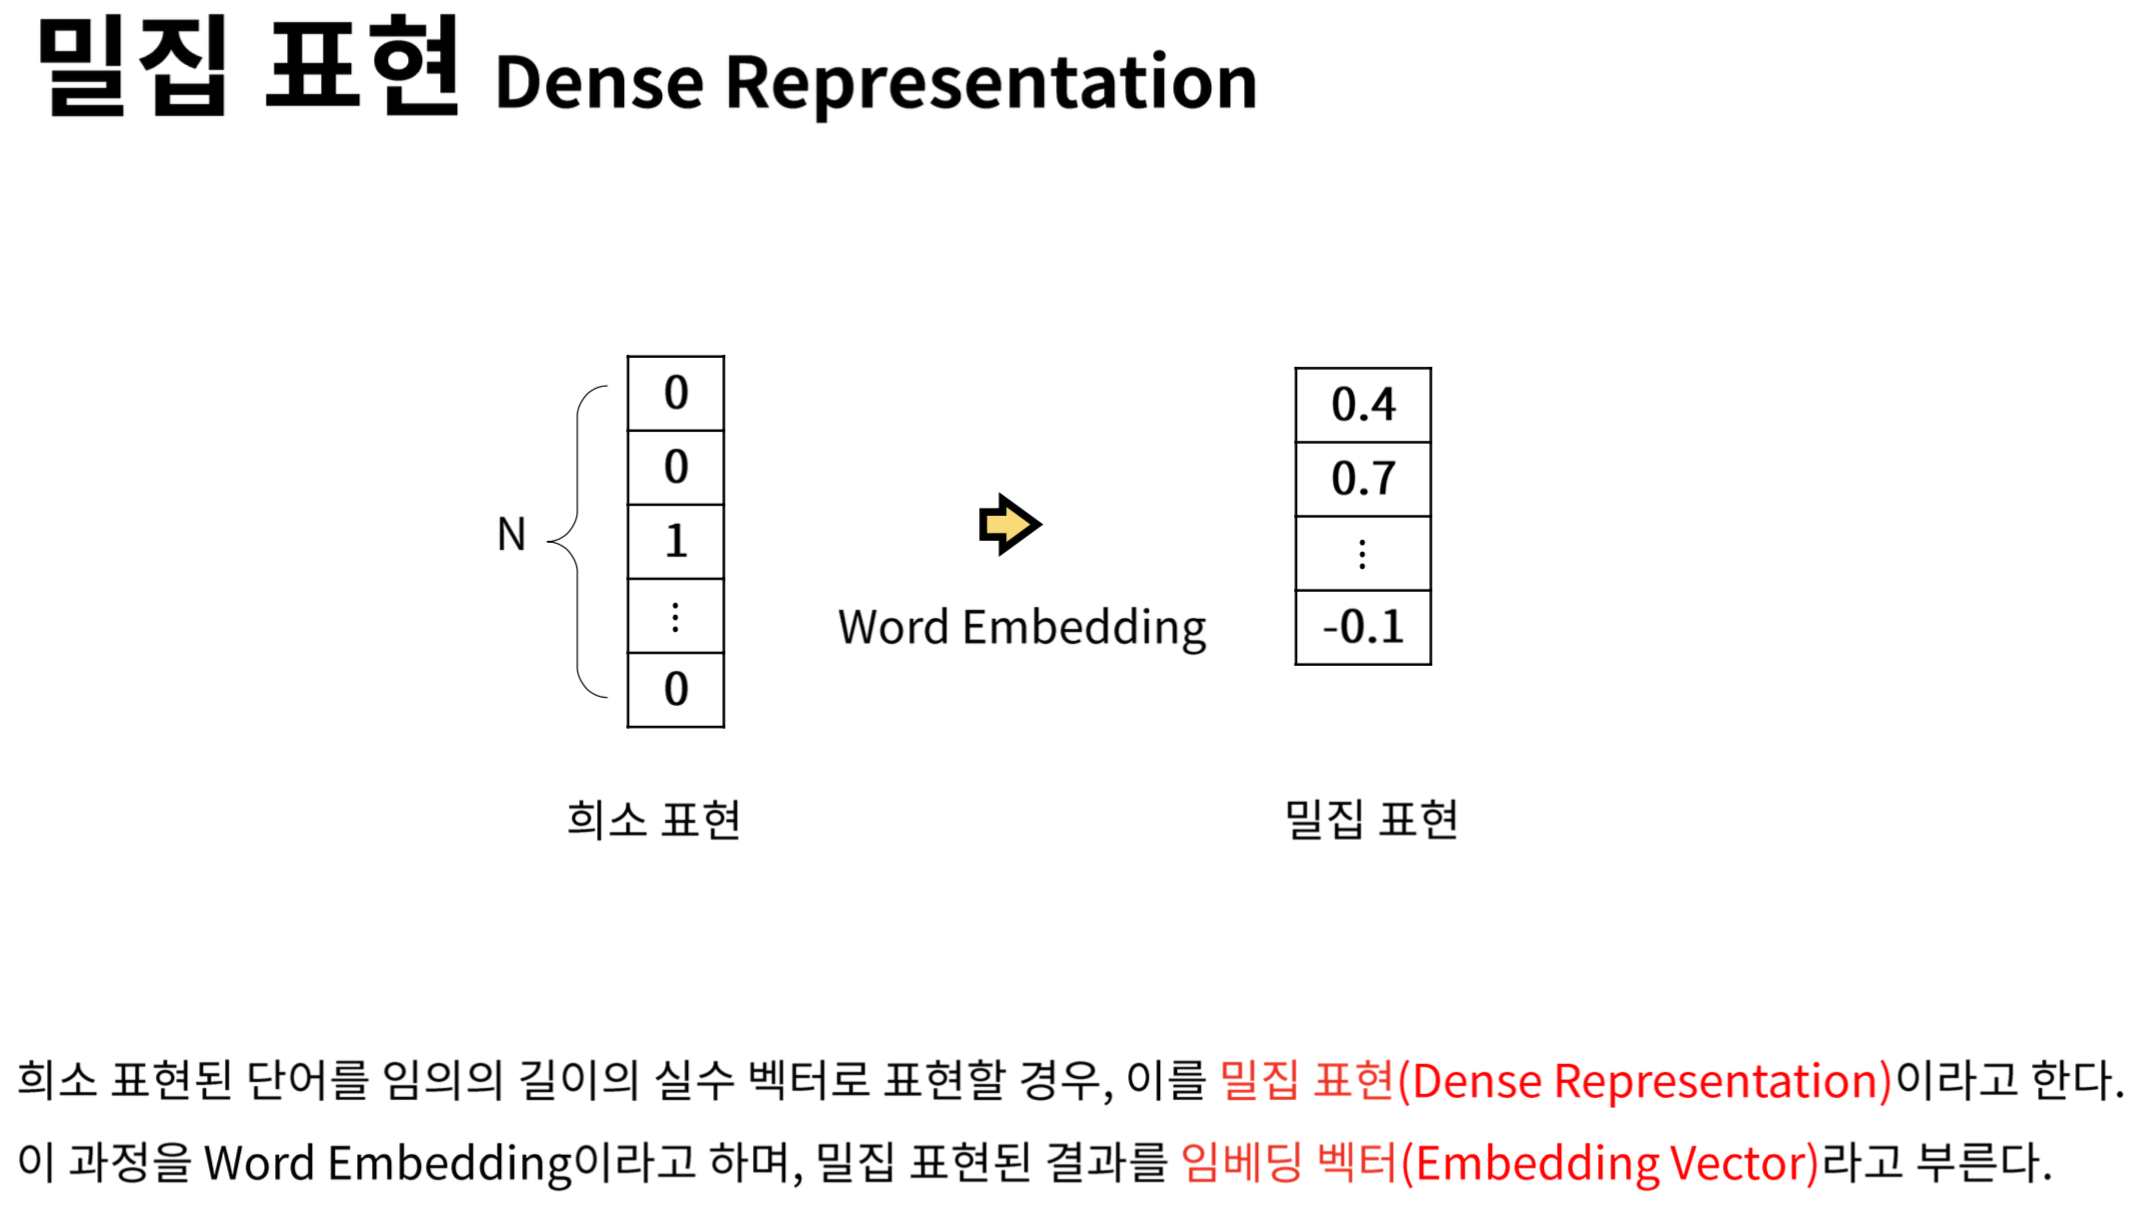

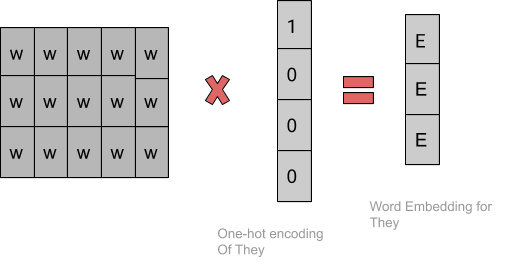

#### 단어 임베딩
- 차원을 임의로 설정가능 (보통 256,512차원, 큰 어휘사전이라면 1,024차원 사용)
- 원-핫 인코딩은 (2만개의 토큰이라면) 20,000차원까지 늘어남
- 단어 간 유사성(관계) 표현 가능
- 랜덤한 단어 벡터로 시작하여 epoch이 지날때마다 단어벡터 학습 (신경망 가중치 학습과 같은 방식)
- 전이 학습 가능

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

- 전체 모델 만들기

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer) # Embedding 층
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


- 모델 설명
1. TF hub층
  - 사전 훈련된 모델 사용하여 하나의 문장을 임베딩 벡터로 매핑
  - 사용한 모델은 하나의 문장을 토큰으로 나누고 각 토큰의 임베딩을 연결하여 반환
  - 최종차원은 (num_examples, embedding_dimension)
2. 16개의 은닉 유닛을 가진 완전 연결층으로 주입
3. 출력 노드 (sigmoid, 0~1 출력)

### 손실함수와 옵티마이저

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델훈련

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 3.0261 - accuracy: 0.5004 - val_loss: 1.1235 - val_accuracy: 0.4771
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 1.0305 - accuracy: 0.4399 - val_loss: 0.8801 - val_accuracy: 0.4360
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.8548 - accuracy: 0.4646 - val_loss: 0.7613 - val_accuracy: 0.5059
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.7361 - accuracy: 0.5260 - val_loss: 0.6714 - val_accuracy: 0.5779
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6509 - accuracy: 0.5918 - val_loss: 0.6203 - val_accuracy: 0.6379
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5999 - accuracy: 0.6476 - val_loss: 0.5799 - val_accuracy: 0.6751
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5557 - accuracy: 0.6924 - val_loss: 0.5431 - val_accuracy: 0.7143
Epoch 8/20
30

### 모델 평가

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - loss: 0.3322 - accuracy: 0.8496
loss: 0.332
accuracy: 0.850
